opencv缩放图片有两种方式，一是通过仿射变换、二是通过resize，本脚本比较这两种方法的差异

由结果可知：**通过仿射变换去缩放图片，等于“最近邻插值”的resize**

In [1]:
# 导入阅读代码工具
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

480 640


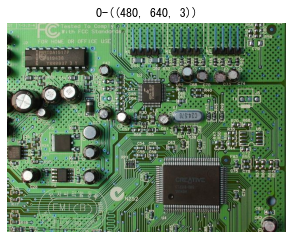

In [2]:
import cv2
import numpy as np

img = cv2.imread('/home/wushaogui/ReadCode/Test/board.jpg')
# img=cv2.resize(img,(250,300))
height, width = img.shape[:2]
print(height,width)
show_images([img])

ori:480,640, new: 240, 320
[[0.5 0.  0. ]
 [0.  0.5 0. ]]


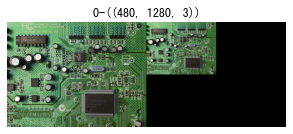

In [3]:
# 直接定义仿射矩阵
new_height=240
new_width=320
print("ori:%d,%d, new: %d, %d"%(height,width,new_height,new_width))
scale=min(new_height/height,new_width/width)
M1=np.array([[scale, 0, 0],
             [0,scale, 0]])
print(M1)

# 应用仿射矩阵缩放图片
iM1=cv2.invertAffineTransform(M1)#逆矩阵，可反向由dst*iM1求得src
dst1=cv2.warpAffine(img,M1,(new_width,new_height))

# 将图片贴回原尺寸空间
new_dst=np.zeros([height,width,3]).astype(np.uint8)
new_dst[:new_height,:new_width,:]=dst1

# 显示原始图片+变换后的图片
img1 = np.hstack([img,new_dst])
show_images([img1])

[[0.5 0.  0. ]
 [0.  0.5 0. ]]


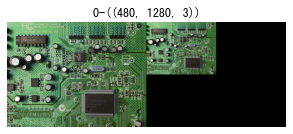

In [4]:
# 通过3对映射点计算仿射矩阵
src_point=np.float32([[0,0],[0,height],[width,0]])
dst_point=np.float32([[0,0],[0,new_height],[new_width,0]])
M2=cv2.getAffineTransform(src_point,dst_point)
print(M2)

# 应用仿射矩阵缩放图片
dst2=cv2.warpAffine(img,M2,(new_width,new_height))

# 将图片贴回原尺寸空间
new_dst1=np.zeros([height,width,3]).astype(np.uint8)
new_dst1[:new_height,:new_width,:]=dst2

# 显示原始图片+变换后的图片
img2 = np.hstack([img,new_dst1])
show_images([img2])

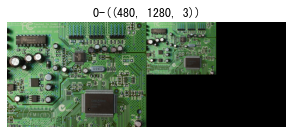

In [5]:
# 直接resize,INTER_LINEAR
dst3=cv2.resize(img,(320,240),None,0,0,cv2.INTER_LINEAR)

# 将图片贴回原尺寸空间
new_dst2=np.zeros([height,width,3]).astype(np.uint8)
new_dst2[:new_height,:new_width,:]=dst3

# 显示原始图片+resize后的图片
img3 = np.hstack([img,new_dst2])
show_images([img3])

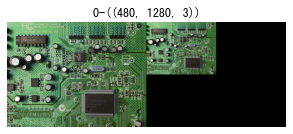

In [6]:
# 直接resize,INTER_LINEAR
dst4=cv2.resize(img,(320,240),None,0,0,cv2.INTER_NEAREST)

# 将图片贴回原尺寸空间
new_dst3=np.zeros([height,width,3]).astype(np.uint8)
new_dst3[:new_height,:new_width,:]=dst4

# 显示原始图片+resize后的图片
img4 = np.hstack([img,new_dst3])
show_images([img4])

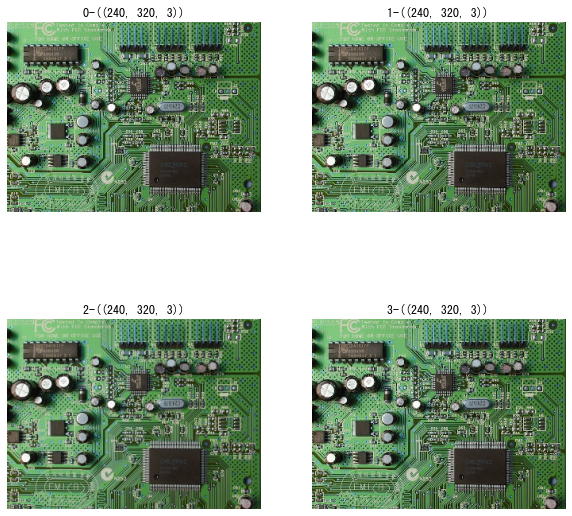

In [7]:
show_images([dst1,dst2,dst3,dst4],)

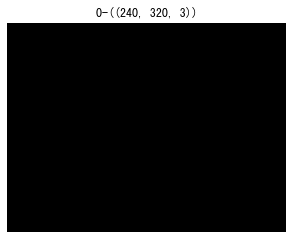

(0, 0.0, 0)

In [8]:
difference = np.subtract(dst1, dst1)
show_images([np.clip(difference,0,255)])
np.min(difference),np.mean(difference),np.max(difference)

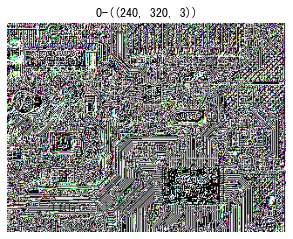

(0, 119.1678732638889, 255)

In [9]:
difference = np.subtract(dst1, dst3)
show_images([np.clip(difference,0,255)])
np.min(difference),np.mean(difference),np.max(difference)

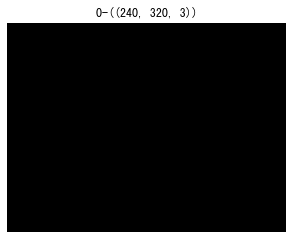

(0, 0.0, 0)

In [10]:
difference = np.subtract(dst1, dst4)
show_images([np.clip(difference,0,255)])
np.min(difference),np.mean(difference),np.max(difference)